In [1]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
import os
import numpy as np
from matplotlib import pyplot as plt
import csv
from IPython import display
import PIL.Image as Image
import tqdm

In [2]:
test_path = "./test_data01/"

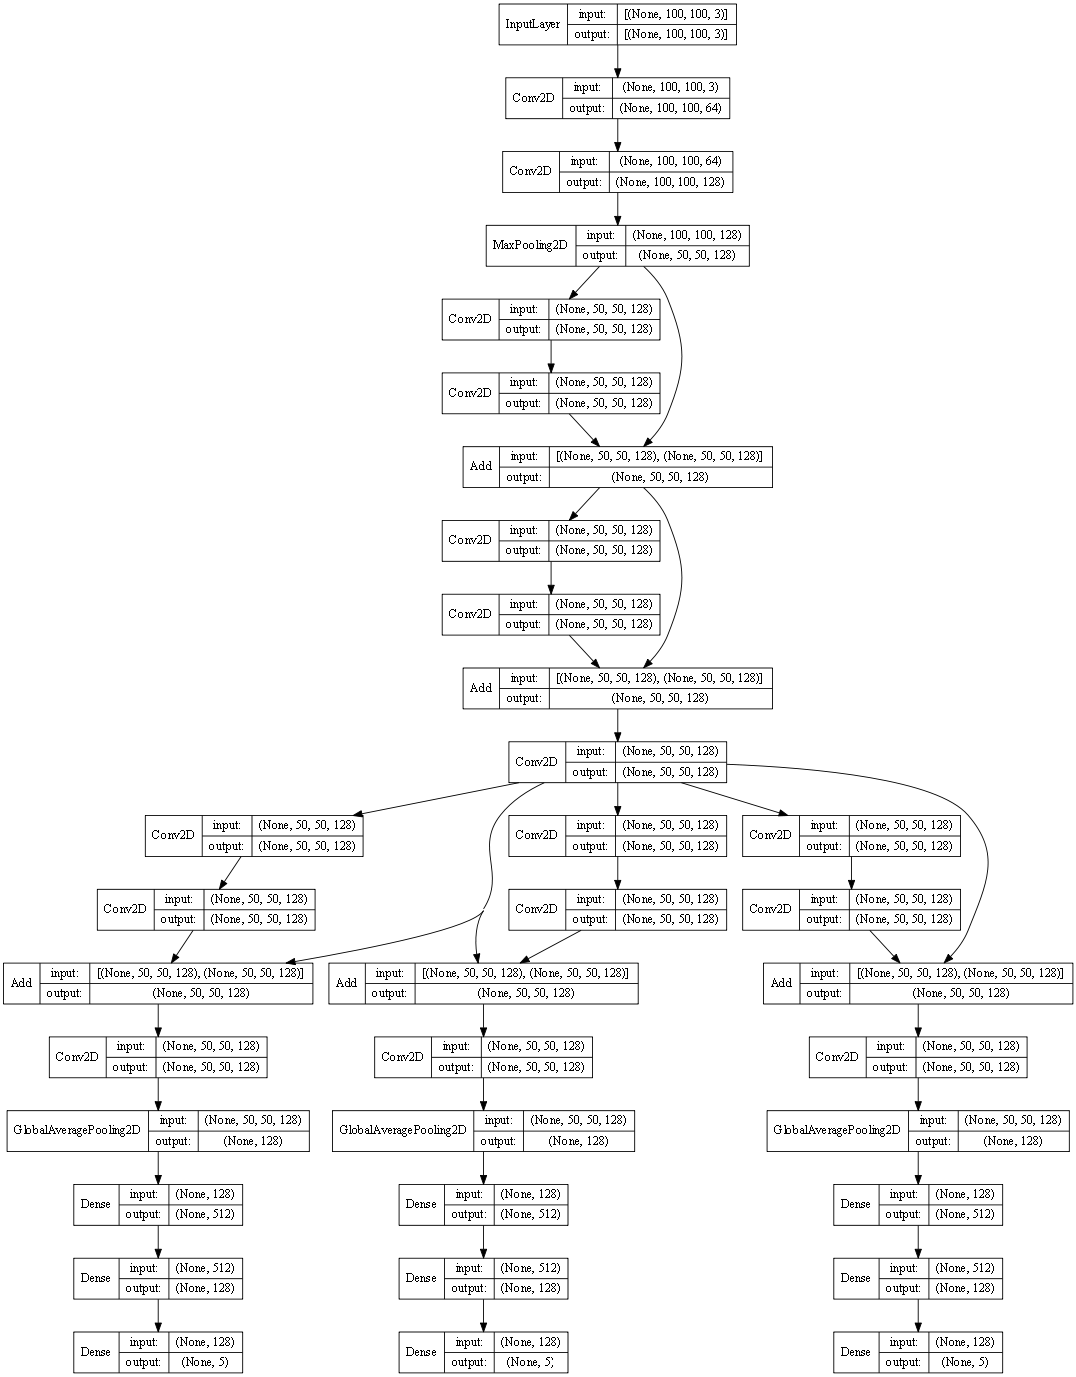

In [3]:
model = tf.keras.models.load_model('./saved_model/sparse_cross_entropy/model6/saved-model-20.hdf5')
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=False, dpi=64)

In [4]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 100, 100, 64) 1792        input[0][0]                      
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 100, 100, 128 73856       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 50, 50, 128)  0           conv2d_1[0][0]                   
______________________________________________________________________________________________

In [5]:
with open('test_data01.csv', 'w', newline='') as csvfile:
    fieldnames = ['id', 'circle', 'square', 'triangle']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    
    for im_path in tqdm.tqdm(os.listdir(test_path)):
        test_im = np.array(Image.open(test_path+im_path)).astype(np.float32)/255
        test_im = tf.expand_dims(test_im, 0)
        prediction = model.predict(test_im)
        ci = np.argmax(tf.nn.softmax(prediction[0]))+1
        sq = np.argmax(tf.nn.softmax(prediction[1]))+1
        tr = np.argmax(tf.nn.softmax(prediction[2]))+1
        writer.writerow({'id': im_path[:-4], 'circle': ci, 'square': sq, 'triangle': tr})

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [07:14<00:00, 23.04it/s]
